<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from collections import defaultdict

# This line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# This line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Load and read the csv file.
csv_rows = []
with open("./sat_scores.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
f.close()
csv_rows

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

In [3]:
# Split the csv file into header and data.
header = csv_rows[0]
data = csv_rows[1:]
header

['State', 'Rate', 'Verbal', 'Math']

In [4]:
# Convert the file into dictionary.
dict_sat_scores={}
for i, col in enumerate(header):
    dict_sat_scores[col]=[]
    for row in data:
        dict_sat_scores[col].append(row[i])
dict_sat_scores

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# Convert dictionary to dataframe.
df = pd.DataFrame.from_dict(dict_sat_scores)
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
# Read dictionary with read.csv function.
sat_scores = "./sat_scores.csv"
df2 = pd.read_csv(sat_scores)
df2.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
# Converting the dictionary to dataframe produces string object columns, while reading the dictionary
# with read.csv function produces one string column and three other integer columns.
print(df.dtypes)
print(df2.dtypes)

State     object
Rate      object
Verbal    object
Math      object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
# The df displays four columns - name of state (State), participation rate (Rate), linguistic exam scores (Verbal),
#     and math (Math) exam scores.
# The table is arranged in ascending order by Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dictionary = "Data Dictionary: \n State(obj): State name in US \n Rate(obj): Crime rate \n Verbal(obj): Language exam scores \n Math(obj): Math exam scores \n Shape: 52 rows 4 columns"
print(data_dictionary)

Data Dictionary: 
 State(obj): State name in US 
 Rate(obj): Crime rate 
 Verbal(obj): Language exam scores 
 Math(obj): Math exam scores 
 Shape: 52 rows 4 columns


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [10]:
# Convert the columns to the correct data types.
df['Rate'] = df['Rate'].astype(int)
df['Verbal'] = df['Verbal'].astype(int)
df['Math'] = df['Math'].astype(int)
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

Text(0, 0.5, 'Count')

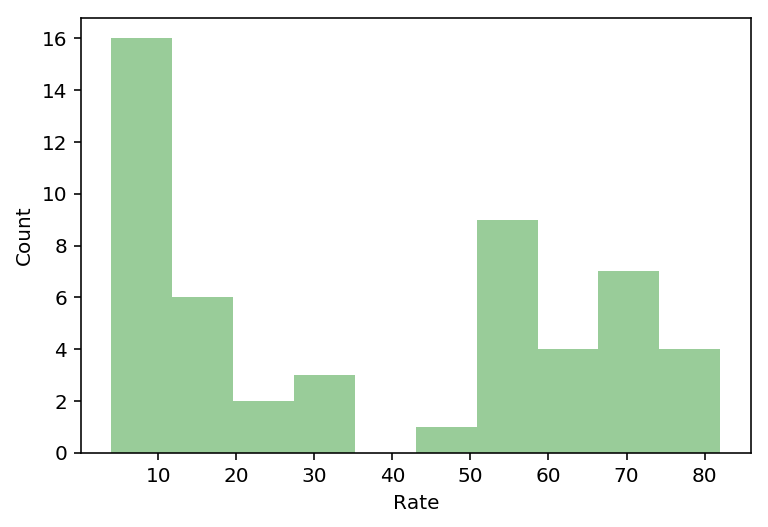

In [11]:
# Plot Rate histogram.
sns.distplot(df['Rate'], kde=False, color = 'green', bins = 10)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

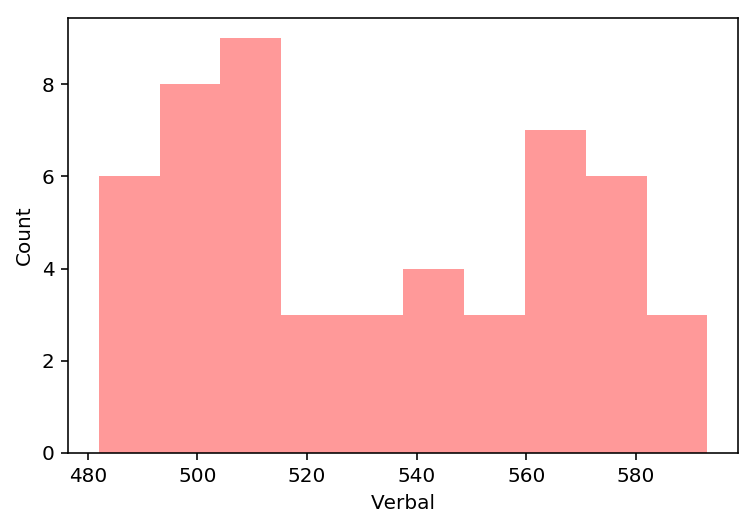

In [12]:
# Plot verbal histogram.
sns.distplot(df['Verbal'], kde=False, color = 'red', bins = 10)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

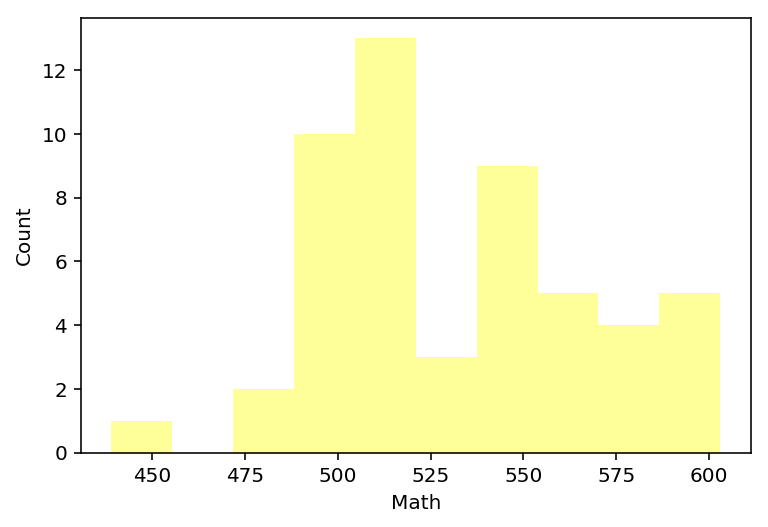

In [13]:
# Plot Math histogram.
sns.distplot(df['Math'], kde=False, color = 'yellow', bins = 10)
plt.ylabel("Count")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

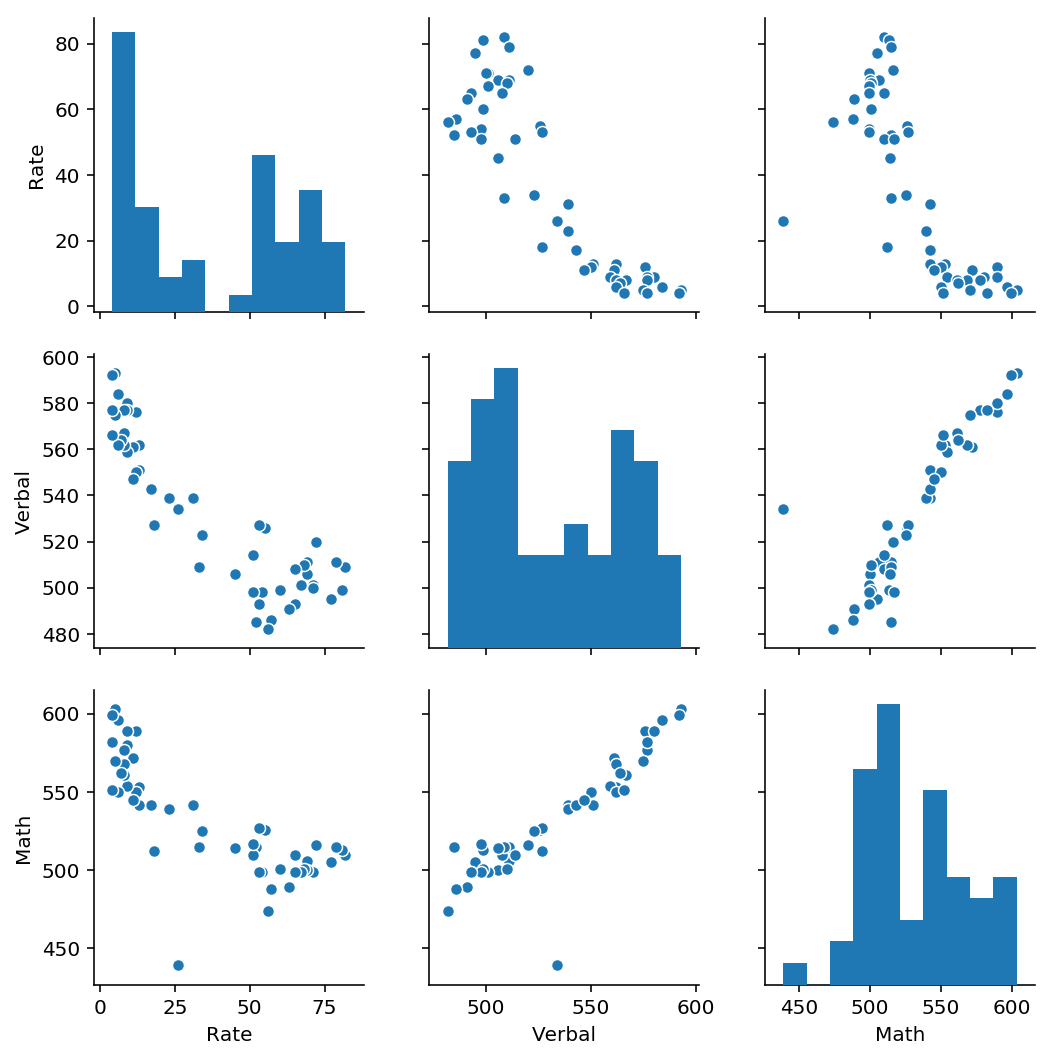

In [14]:
sns.pairplot(df)

In [15]:
# There is a relationship between Rate and the rest of the variables.
# As Rate increases, the scores for Math and Verbal decrease.
# There are two outliers in the charts

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

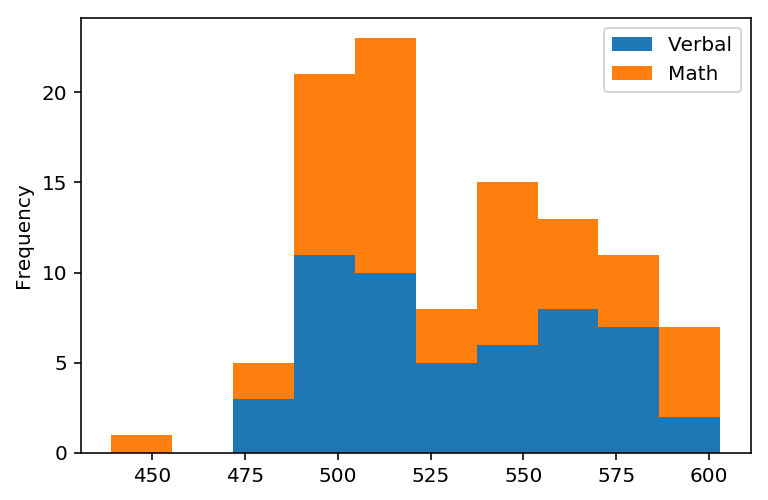

In [16]:
# Plot stacked histogram with Verbal and Math.
df_vm = df[['Verbal','Math']]
df_vm.plot.hist(stacked = True, bins = 10)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

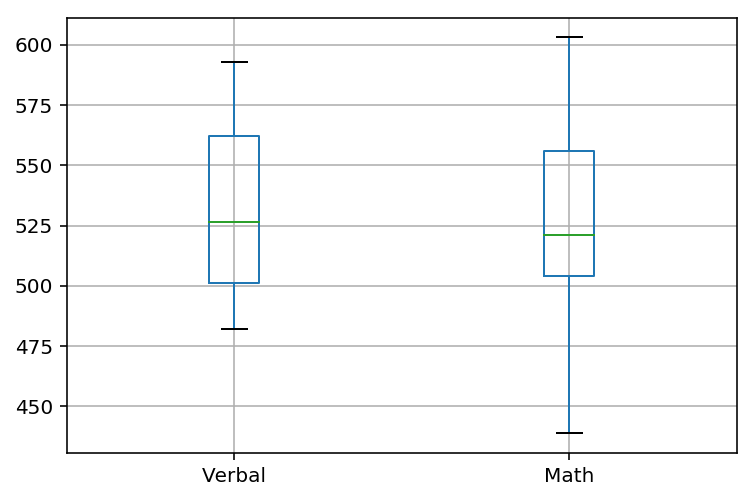

In [17]:
# Plot boxplot with Verbal and Math.
df_vm.boxplot()

In [18]:
# Box plots provide some information that histograms do not. They typically provide the median,
#     25th and 75th percentile, min/max that is not an outlier and explicitly separates the points 
#     that are considered outliers. However, the much bigger advantage is in comparing distributions 
#     across many different groups all at once. With 10+ groups, this is a tiring task with side-by-side 
#     histograms, but very easy with box plots.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [19]:
# Find the max of Verbal and Math to convert the values to percentages.
print(df['Verbal'].max())
print(df['Math'].max())

593
603


In [20]:
# Convert all to percentage
subset = df[['Rate', 'Verbal', 'Math']].copy()
subset['Verbal'] = subset['Verbal'].map(lambda x: x/593 * 100)
subset['Math'] = subset['Math'].map(lambda x: x/603 * 100)
subset.head()

,Rate,Verbal,Math
0,82,85.834739,84.577114
1,81,84.148398,85.074627
2,79,86.172007,85.406302
3,77,83.473862,83.747927
4,72,87.689713,85.572139


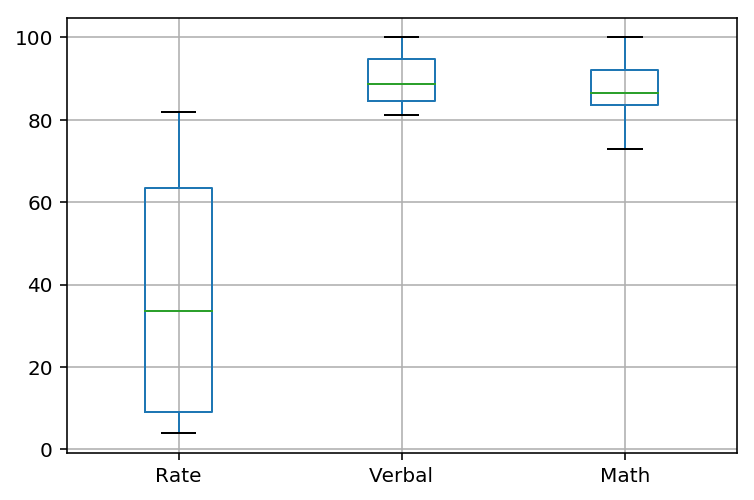

In [21]:
# Plot bloxplot with Rate, Verbal and Math.
subset.boxplot()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [22]:
# Finding states with Verbal higher than the national average.
df[df['Verbal'] > df['Verbal'].mean()].head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [23]:
# 24 states have surpassed the national average.
df[df['Verbal'] > df['Verbal'].mean()].describe()

,Rate,Verbal,Math
count,24.00000,24.000000,24.00000
mean,10.87500,564.041667,560.62500
std,7.03601,16.624966,32.61743
min,4.00000,534.000000,439.00000
25%,6.00000,550.750000,548.75000
50%,9.00000,563.000000,561.50000
75%,12.25000,577.000000,580.50000
max,31.00000,593.000000,603.00000


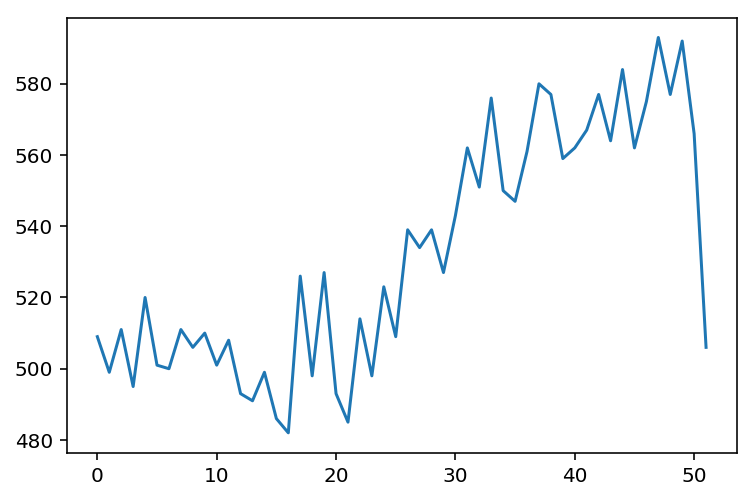

In [24]:
# The Verbal distribution is negatively skewed.
df['Verbal'].plot()

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
df[df['Verbal'] > df['Verbal'].median()].head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [26]:
df['Difference'] = df['Verbal'] - df['Math']
df.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
# 1. First dataframe of 10 states with Verbal scores higher than Math.
first_df = df.sort_values('Difference',ascending = False).head(10)
first_df

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [28]:
# 2. Second dataframe of 10 states with Math scores higher than Verbal.
second_df = df.sort_values('Difference',ascending = True).head(10)
second_df

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [29]:
# 3. First dataframe showing the top 3 states.
first_df.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [30]:
# 3. Second dataframe showing the top 3 states.
second_df.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


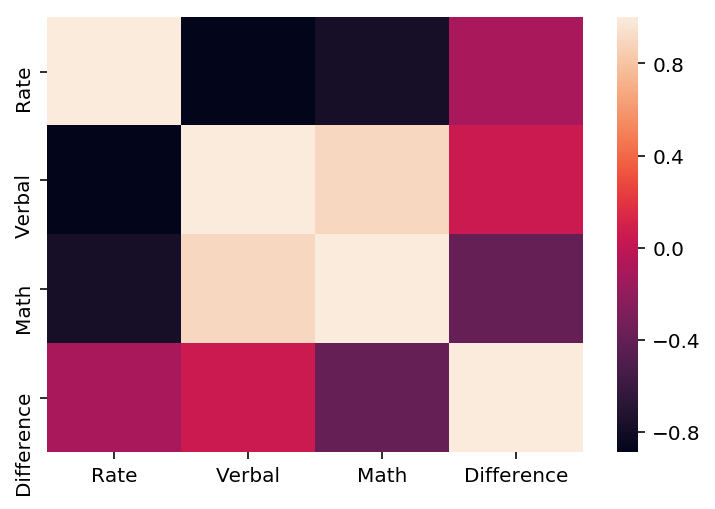

In [31]:
# There's a strong correlation between Verbal and Math.
scores_correlations = df.corr()
sns.heatmap(scores_correlations)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
df.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [33]:
# Count shows the number of elements in the column.
# Mean shows the average of the whole column.
# Std refers to standard deviation.
# Min shows the smallest element in the column.
# 25%, 50% and 75% are quartiles which display the figures at respective quartiles.
# Max shows the biggest element in the column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
# Guided steps:
#     1. Load data.
#     2. Hygiene checks.
#     3. Understand the data you are looking at - what do the columns/rows/numbers mean?
#     4. Any possible problems in the dataset?
#     5. Identify and fix, or find workarounds so that your data is ready for the next step.

In [35]:
# Load data.
df = pd.read_csv("./drug-use-by-age.csv")
df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [36]:
# Hygiene checks - ensuring that the columns are of the right data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [37]:
df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [38]:
# Checking to see what is causing the series to be a string object.
# The - sign is the culprit.
df['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [39]:
df['meth-frequency'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

In [40]:
# Hence, I replaced - with 0.0 and converted the series into float.
df['meth-frequency'] = df['meth-frequency'].map(lambda x: float(x.replace('-','0.0')))
df['cocaine-frequency'] = df['cocaine-frequency'].map(lambda x: float(x.replace('-','0.0')))
df['crack-frequency'] = df['crack-frequency'].map(lambda x: float(x.replace('-','0.0')))
df['heroin-frequency'] = df['heroin-frequency'].map(lambda x: float(x.replace('-','0.0')))
df['inhalant-frequency'] = df['inhalant-frequency'].map(lambda x: float(x.replace('-','0.0')))
df['oxycontin-frequency'] = df['oxycontin-frequency'].map(lambda x: float(x.replace('-','0.0')))

In [41]:
# All the columns are now in float, except age and n.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [42]:
df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [43]:
# Checking if there are any anomalies in the age.
df['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [44]:
# Guided steps:
#     1. Ask questions about the data.
#     2. Univariate analysis - distribution.
#     3. Bivariate analysis - correlation/association.
#     4. Create any new features that might be useful - and state assumptions.
#     5. Apply transformations like long/wide format if necessary.

In [45]:
# Before performing EDA, here are my assumptions on some of the variables which are a little ambiguous:
#     n refers to population (for that age group).
#     drug-use refers to the percentage of drug users (they may overlap; ie one person may use multiple drugs)
#     drug-frequency refers to the percentage frequency usage of the drug.

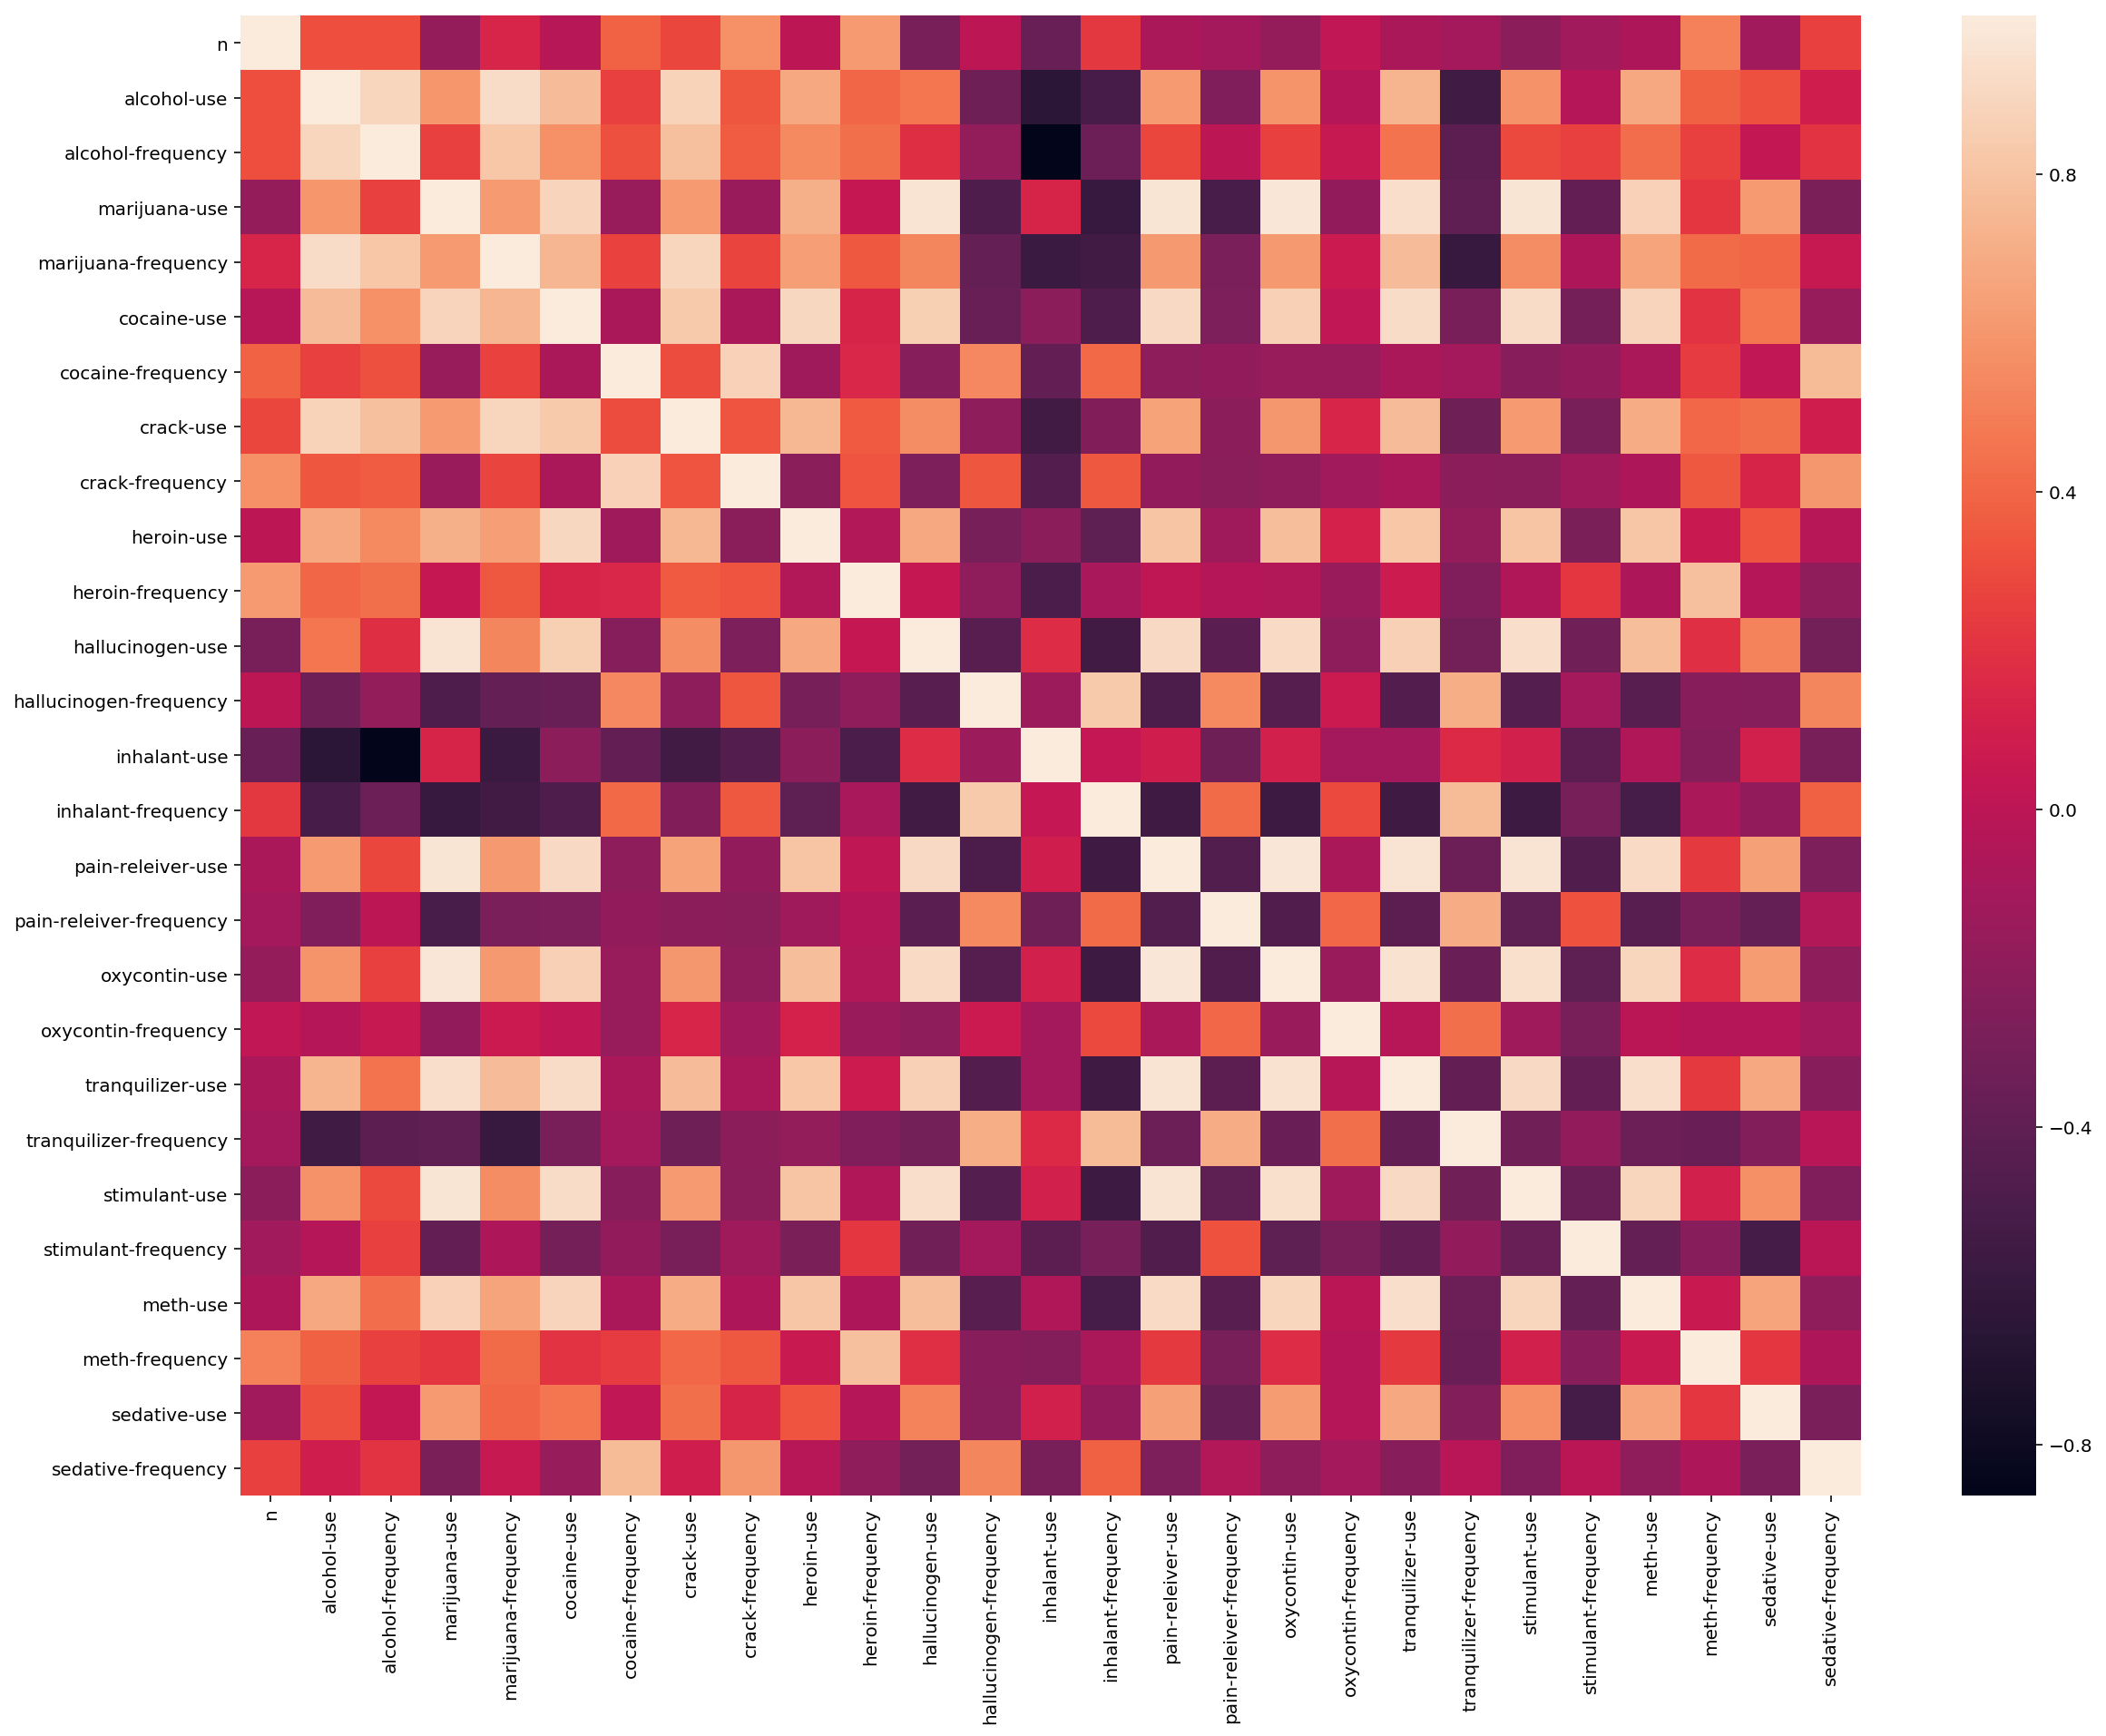

In [46]:
# Plotted a heat map so that I can have an overview of the possible correlations between variables.
# It seems that marijuana-use is correlated with a few other drugs.
plt.figure(figsize=(20,15))
drug_correlations = df.corr()
sns.heatmap(drug_correlations)

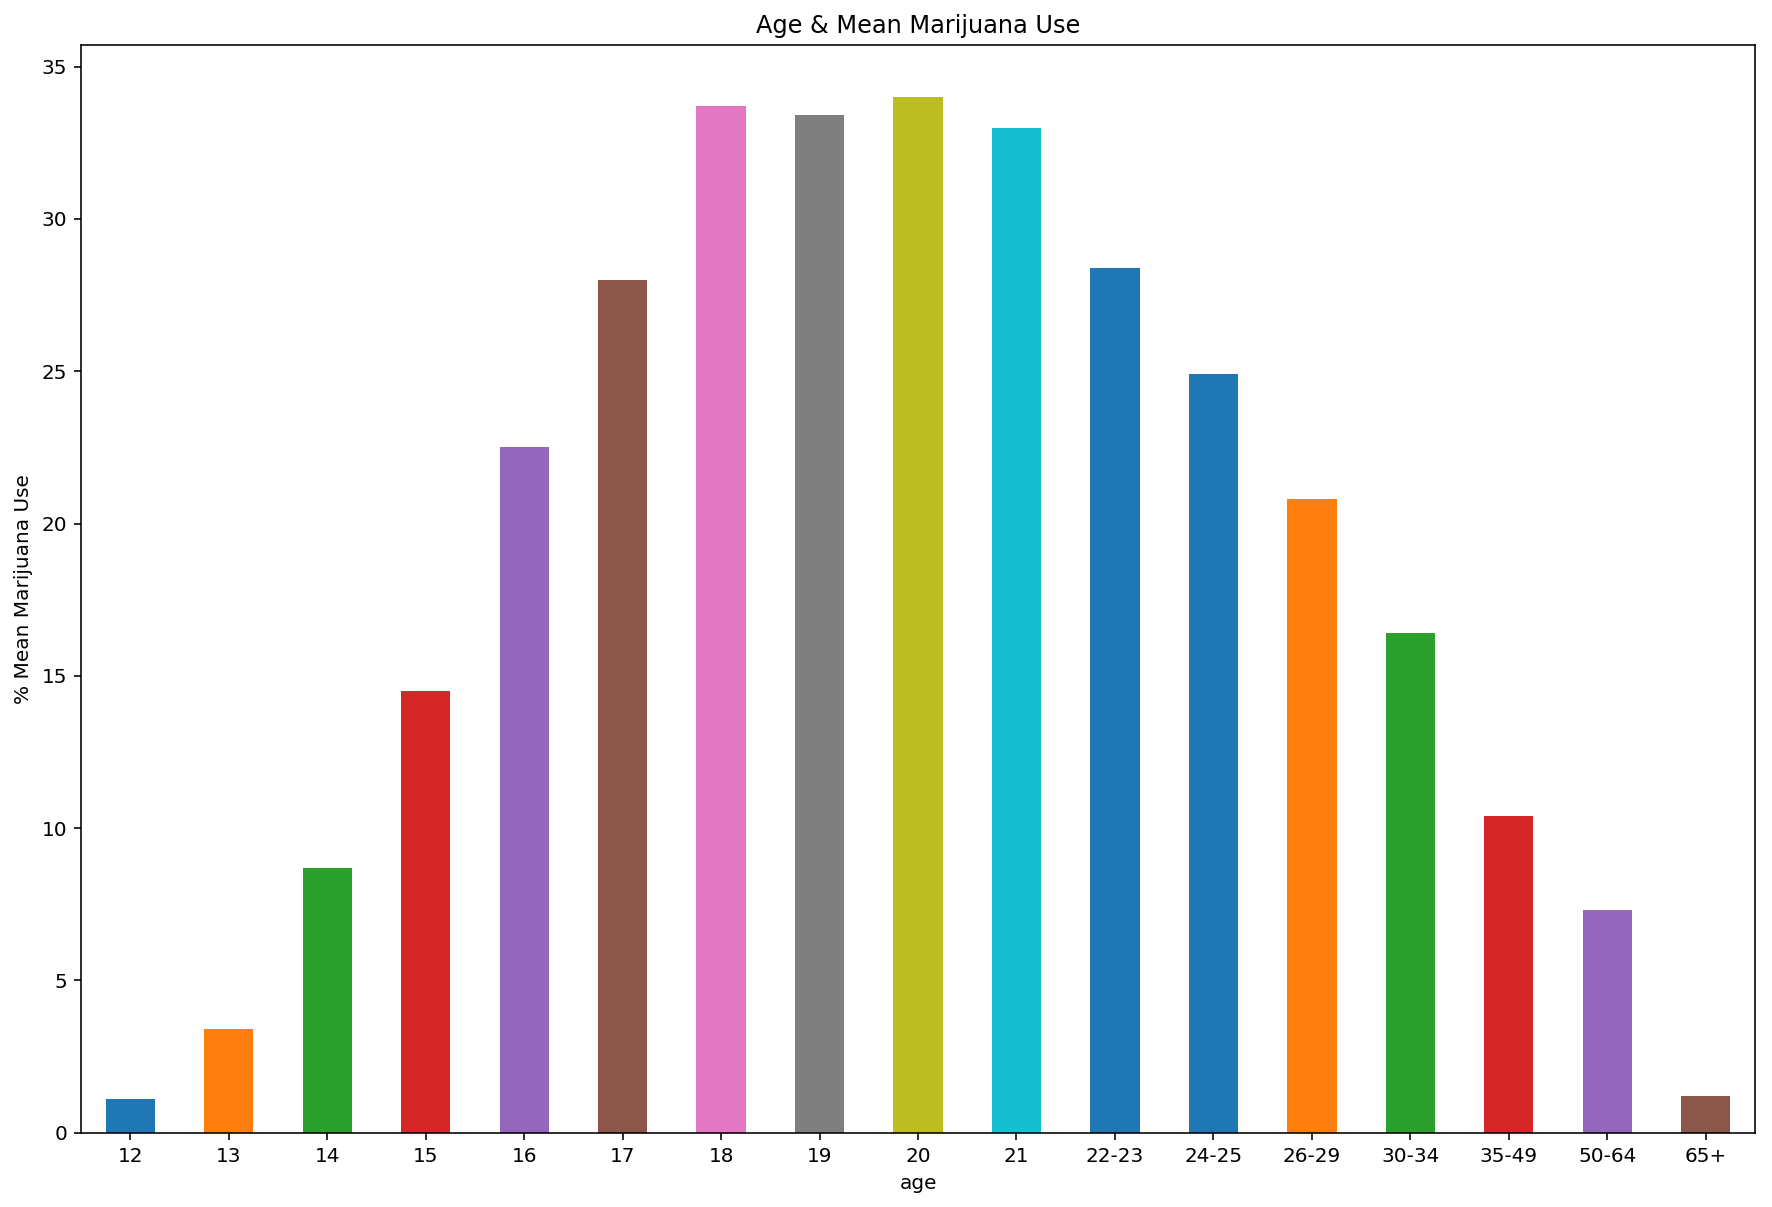

In [47]:
# When I saw marijuana as one of the variables, I immediately thought this should be investigated as I was curious to
# see if there are more adults (> 21 years old) and elderly (> 50 years old) using this drug (as painkillers to treat 
# severe illnesses or to numb the pain after operations/surgeries) than youths. But the results were interesting -
# the distribution is normal, with 20 year olds taking more marijuana than adults and senior citizens.
# It is possible that the people in this age group are marijuana drug abusers.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel('% Mean Marijuana Use')
ax.set_xlabel('Age')
ax.set_title('Age & Mean Marijuana Use')
df.groupby(['age'])['marijuana-use'].mean().plot(kind = 'bar', rot = 0)
# df.groupby(['age'])['marijuana-use'].mean().sort_values(ascending = False).plot(kind = 'bar', rot = 0)

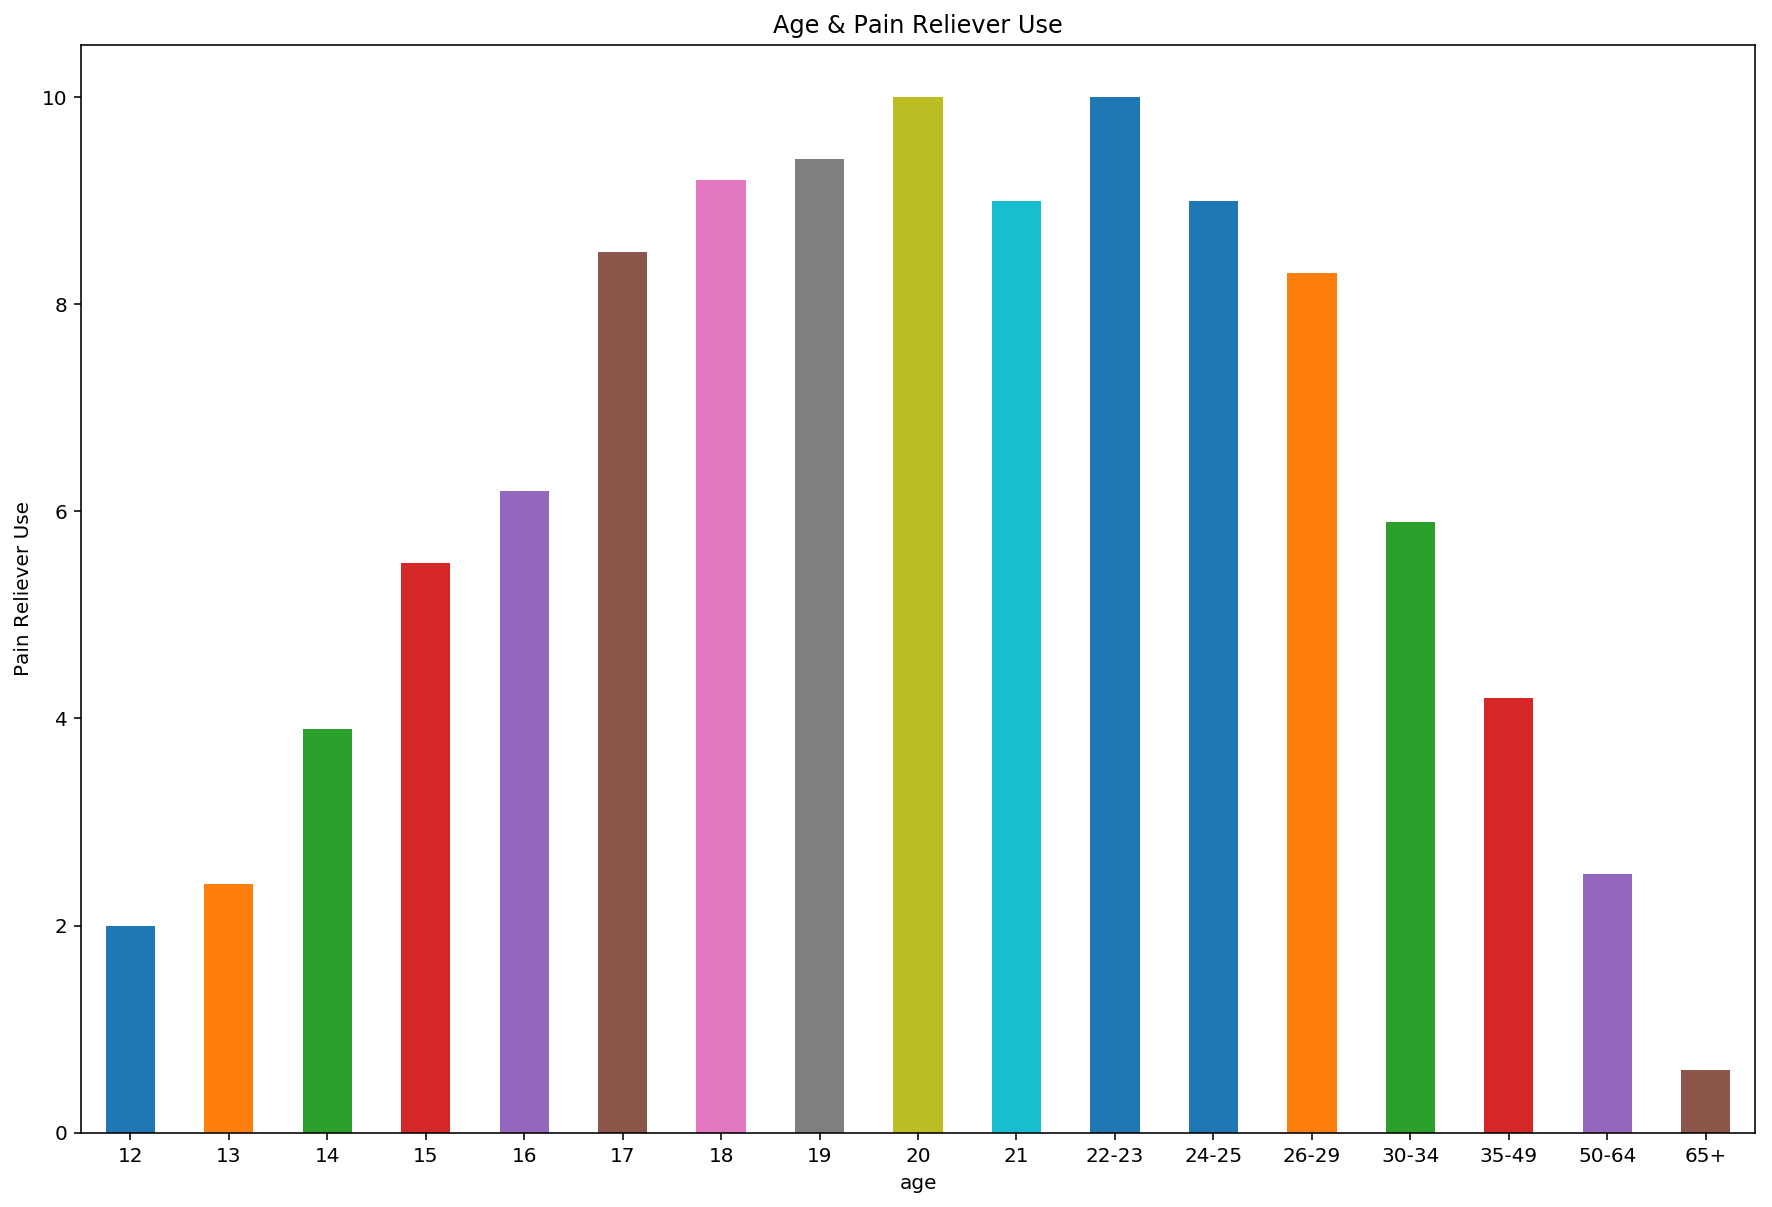

In [48]:
# Further exploring age and pain-reliever-use for possible correlations.
# Again, the 20 years old age group tops the chart with the highest usage of pain relievers.

fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel('Pain Reliever Use')
ax.set_xlabel('Age')
ax.set_title('Age & Pain Reliever Use')
df.groupby(['age'])['pain-releiver-use'].mean().plot(kind = 'bar', rot = 0)

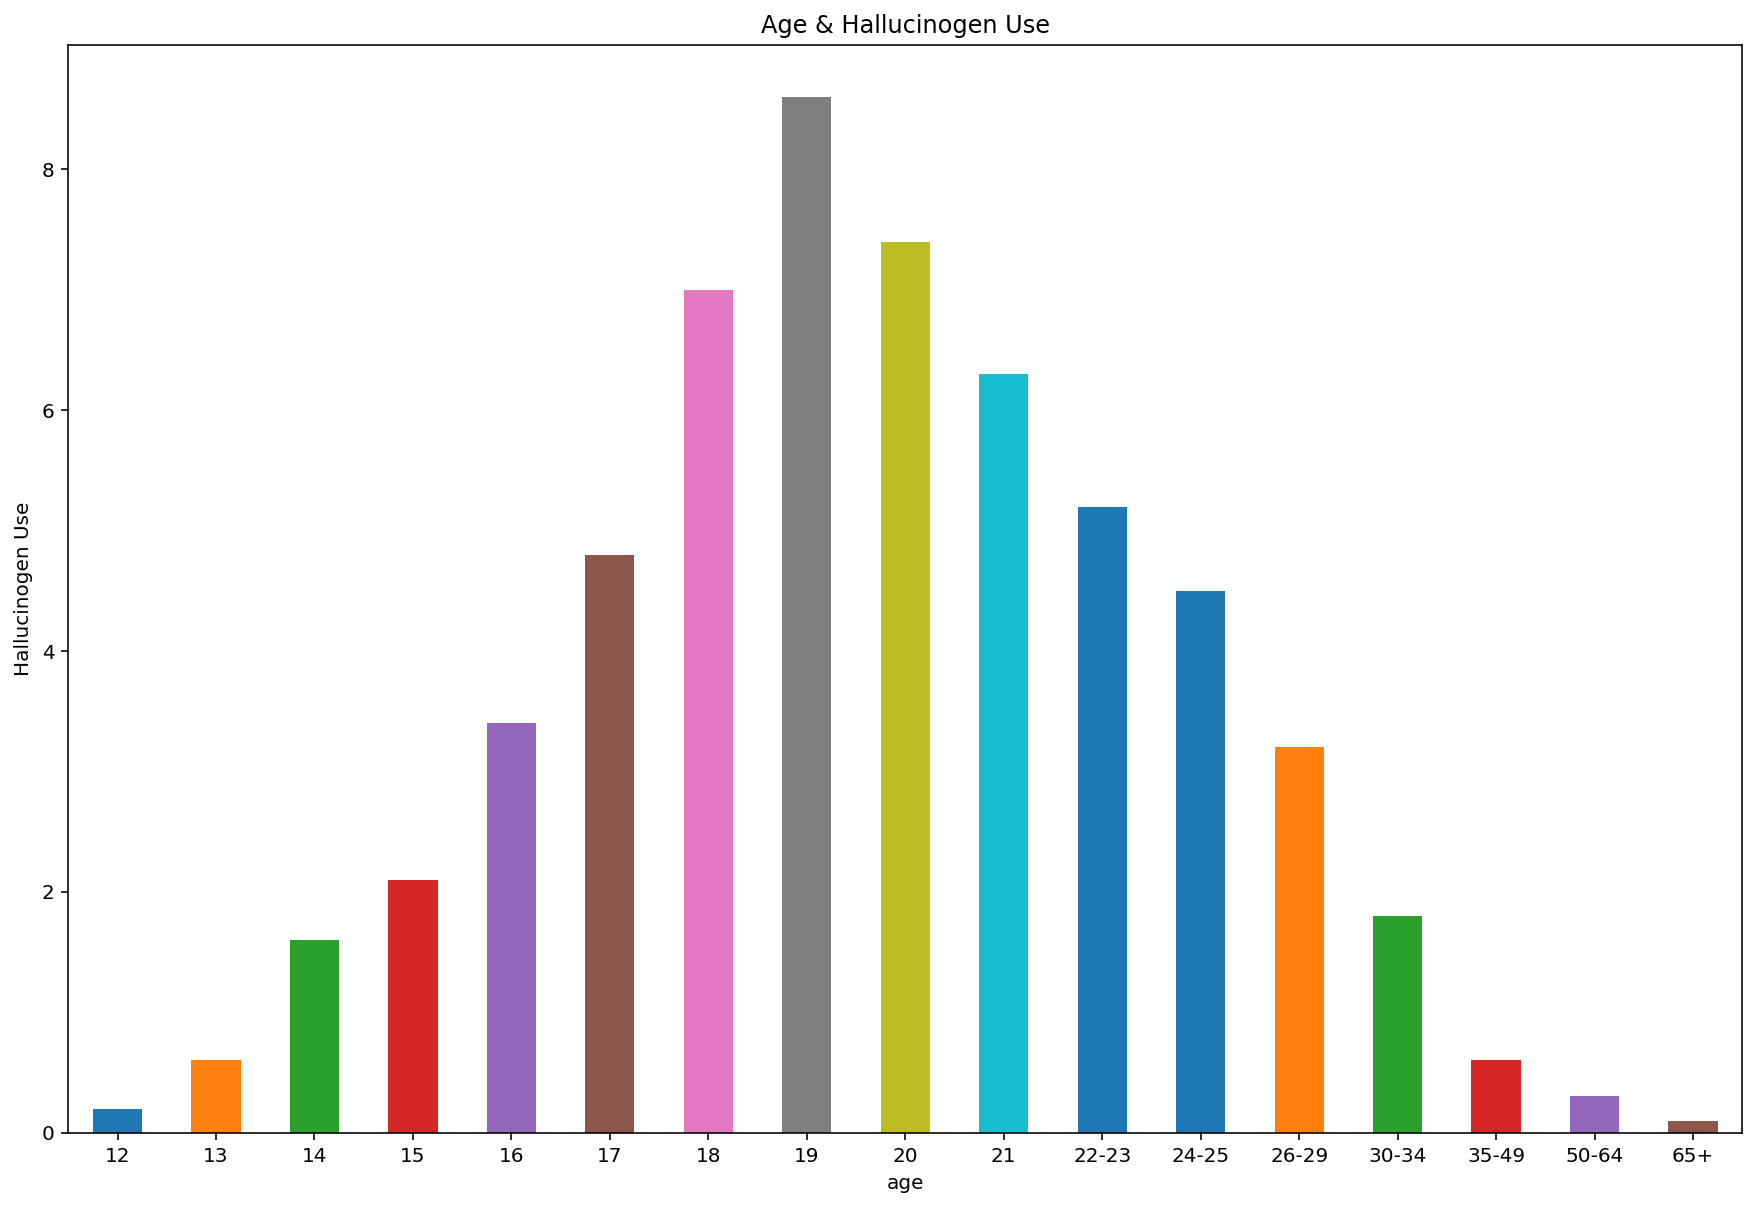

In [49]:
# Further exploring the hallucinogen-use and age for possible correlations.
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel('Hallucinogen Use')
ax.set_xlabel('Age')
ax.set_title('Age & Hallucinogen Use')
df.groupby(['age'])['hallucinogen-use'].mean().plot(kind = 'bar', rot = 0)

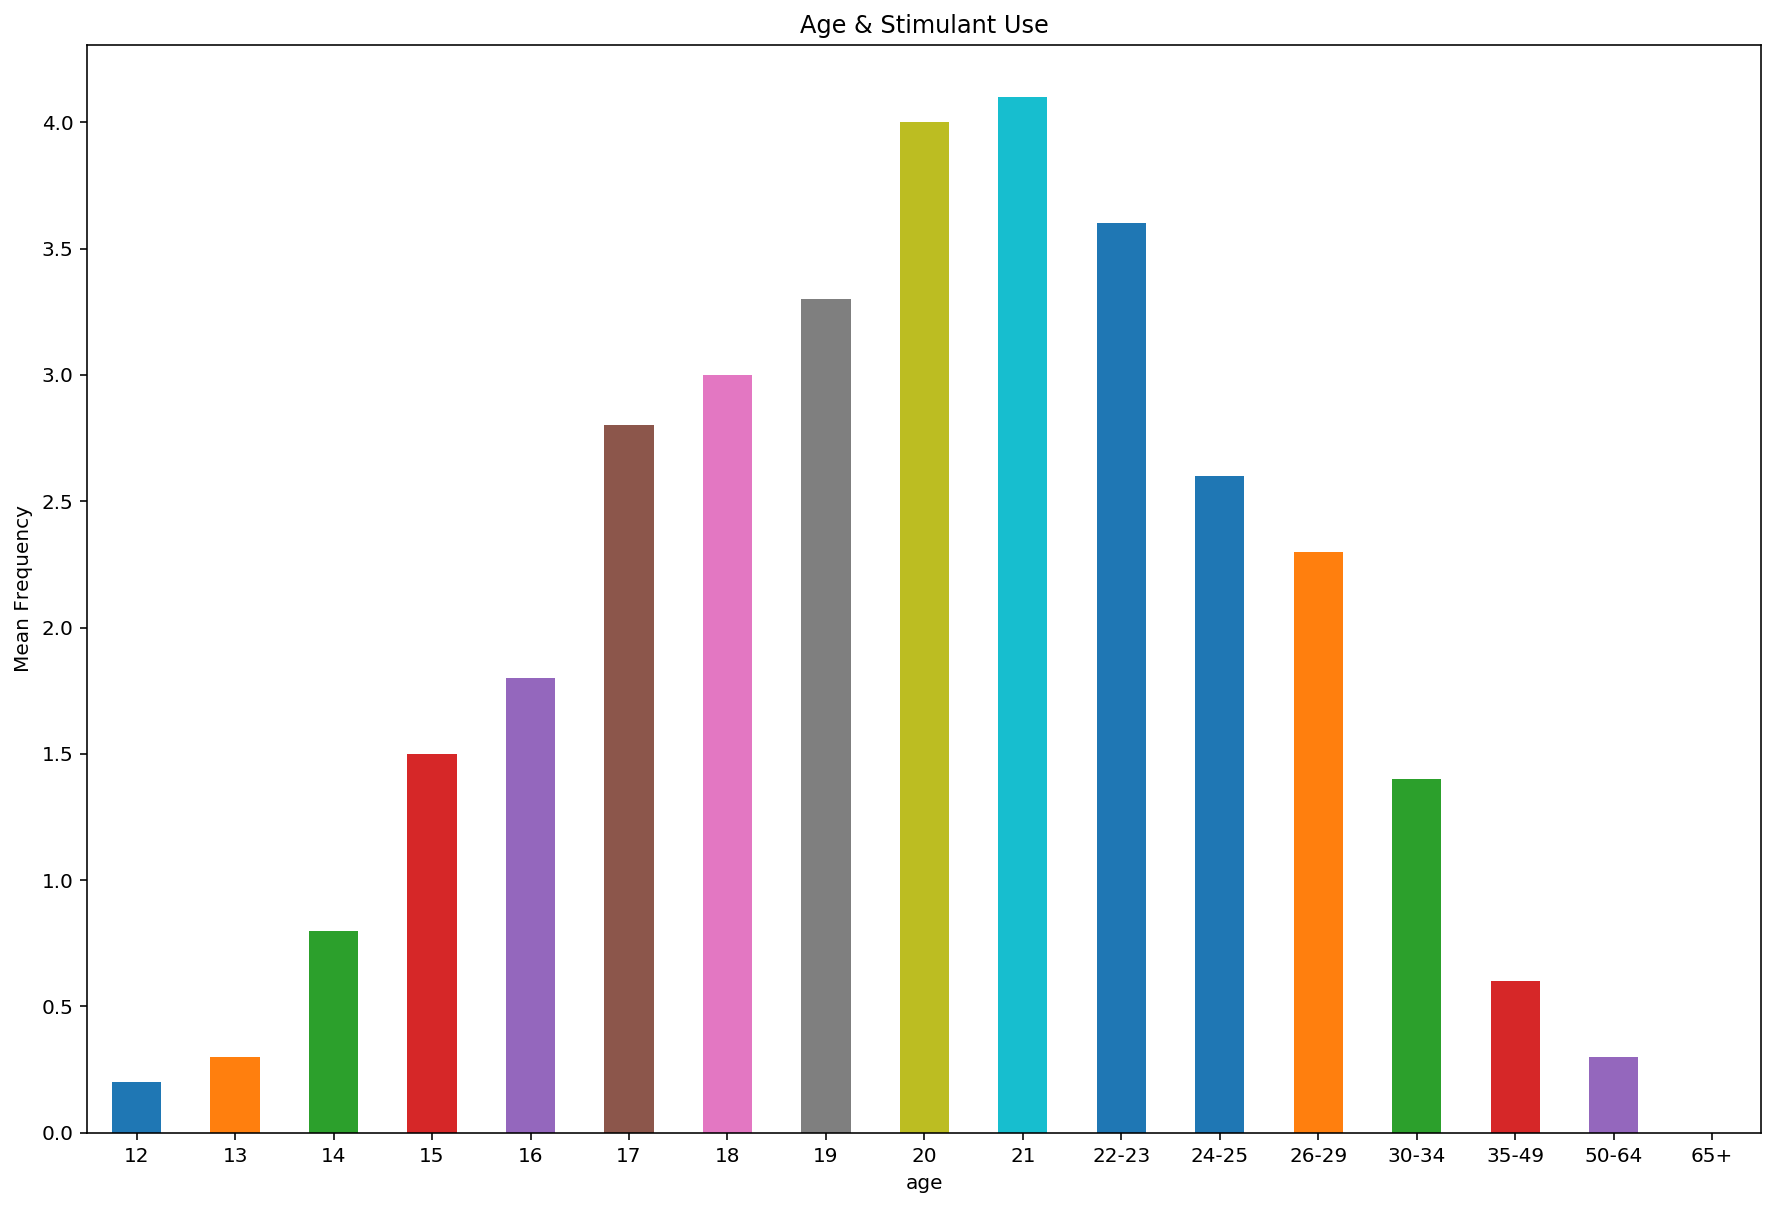

In [50]:
# Further exploring the stimulant-use and age for possible correlations.
fig, ax = plt.subplots(figsize = (15,10))
ax.set_ylabel('Mean Frequency')
ax.set_xlabel('Age')
ax.set_title('Age & Stimulant Use')
df.groupby(['age'])['stimulant-use'].mean().plot(kind = 'bar', rot = 0)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [51]:
# Guided steps:
#     1. Code
#     2. Markdown for report
#     3. Important to know differences between between T-test and Chi Sq.

In [52]:
# As marijuana and general painkillers are under the same tree of painkillers, I wanted to find out if
# people in the 20 years old group who consumed marijuana, are likely to take painkillers (ie any correlation 
# between the two drugs usage). Hence, I created and tested my hypothesis by following the three steps below.

In [53]:
# Step 1: Establish the null and alternate hypothesis.
#     H0: 20yo people who use marijuana are NOT likely to use painkillers.
#     H1: 20yo people who use marijuana are likely to use painkillers.

# Extra notes (for my reference):
# H0: The two samples are independent.
# H1: There is a dependency between the samples.

In [54]:
# Step 2: Establish the level of significance.

# α = 0.05

In [55]:
# Calculated the numbers for each drug and non-drug users.

Percentage_marijuana_users = 0.34
Percentage_painkiller_users = 0.10
Total_population = 2271

Num_marijuana_users = round(Percentage_marijuana_users * Total_population)
Num_nonmarijuana_users = Total_population - Num_marijuana_users

Num_painkiller_users = round(Percentage_painkiller_users * Total_population)
Num_nonpainkiller_users = Total_population - Num_painkiller_users
print("Number of marijuana users:", Num_marijuana_users)
print("Number of non-marijuana users:", Num_nonmarijuana_users)
print("Number of painkiller users:", Num_painkiller_users)
print("Number of non-painkiller users:", Num_nonpainkiller_users)

Number of marijuana users: 772
Number of non-marijuana users: 1499
Number of painkiller users: 227
Number of non-painkiller users: 2044


In [56]:
# Step 3: Compute the value of chi-square and p-value, and make a decision.
table = np.array([[Num_marijuana_users, Num_nonmarijuana_users],
                 [Num_painkiller_users, Num_nonpainkiller_users]])

results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print("Chi value:", chi2)
print("P-value:", pvalue)

# In chi-square test, if p < 0.05, we reject the null hypothesis.

Chi value: 379.75918679051614
P-value: 1.4040743547314398e-84


**Report**

The chi-square test produced a p-value of 1.4, which was far greater than our significance level of 0.05.
Hence, we disprove the null hypothesis, and accept H1.

    H1: 20yo people who use marijuana are likely to use painkillers.
    
There is a strong correlation between those taking marijuana and painkillers (ie marijuana users are likely
to be painkiller users).

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [57]:
# Look at Rate

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [58]:
# drug use dataset
# how to present outliers in a different way? via percentiles?